# Machine Learning Classification: Predicting Airline Passenger Satisfaction

## Dataset
I am going to use the dataset "Airline Passenger Satisfaction Score Classification" from Kaggle in this project, which includes Gender, Customer Type, Age, Purpose of traveling, Class, Flight Distance, Wi-fi Service, Ease of online booking, Gate location, food and Drink, Online Boarding service, Inflight Entertainment, Baggage handling, Check-in service, Cleanliness, Departure Delay in Minutes, Arrival Delay in Minutes, and Satisfaction.

- Gender: Gender of the passengers (Female, Male)
- Customer Type: The customer type (Loyal customer, disloyal customer)
- Age: The actual age of the passengers
- Type of Travel: Purpose of the flight of the passengers (Personal Travel, Business Travel)
- Class: Travel class in the plane of the passengers (Business, Eco, Eco Plus)
- Flight distance: The flight distance of this journey
- Inflight wifi service: Satisfaction level of the inflight wifi service (0:Not Applicable;1-5)
- Departure/Arrival time convenient: Satisfaction level of Departure/Arrival time convenient
- Ease of Online booking: Satisfaction level of online booking
- Gate location: Satisfaction level of Gate location
- Food and drink: Satisfaction level of Food and drink
- Online boarding: Satisfaction level of online boarding
- Seat comfort: Satisfaction level of Seat comfort
- Inflight entertainment: Satisfaction level of inflight entertainment
- On-board service: Satisfaction level of On-board service
- Leg room service: Satisfaction level of Leg room service
- Baggage handling: Satisfaction level of baggage handling
- Check-in service: Satisfaction level of Check-in service
- Inflight service: Satisfaction level of inflight service
- Cleanliness: Satisfaction level of Cleanliness
- Departure Delay in Minutes: Minutes delayed when departure
- Arrival Delay in Minutes: Minutes delayed when Arrival
- Satisfaction: Airline satisfaction level(Satisfaction, neutral or dissatisfaction)

## Library imports
- Pandas for data processing
- Sklearn for machine learning model
- seaborn and matplotlib for ploting graphs
- numpy for basical operations

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from scipy import stats
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import normalize
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model
from sklearn.naive_bayes import GaussianNB
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier

## Read the data
For the project, I will be using the first 5000 entries only.

In [2]:
df = pd.read_csv('test.csv')[:5000]
df = df.dropna()
df = df.drop(['Unnamed: 0', 'id'], axis=1)
df.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,Female,Loyal Customer,52,Business travel,Eco,160,5,4,3,4,...,5,5,5,5,2,5,5,50,44.0,satisfied
1,Female,Loyal Customer,36,Business travel,Business,2863,1,1,3,1,...,4,4,4,4,3,4,5,0,0.0,satisfied
2,Male,disloyal Customer,20,Business travel,Eco,192,2,0,2,4,...,2,4,1,3,2,2,2,0,0.0,neutral or dissatisfied
3,Male,Loyal Customer,44,Business travel,Business,3377,0,0,0,2,...,1,1,1,1,3,1,4,0,6.0,satisfied
4,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,4,3,...,2,2,2,2,4,2,4,0,20.0,satisfied


## Overview of the Dataset

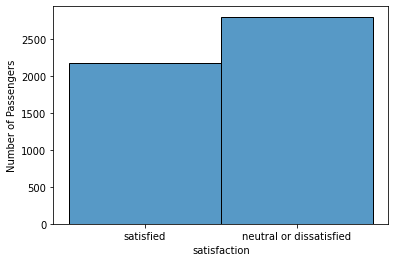

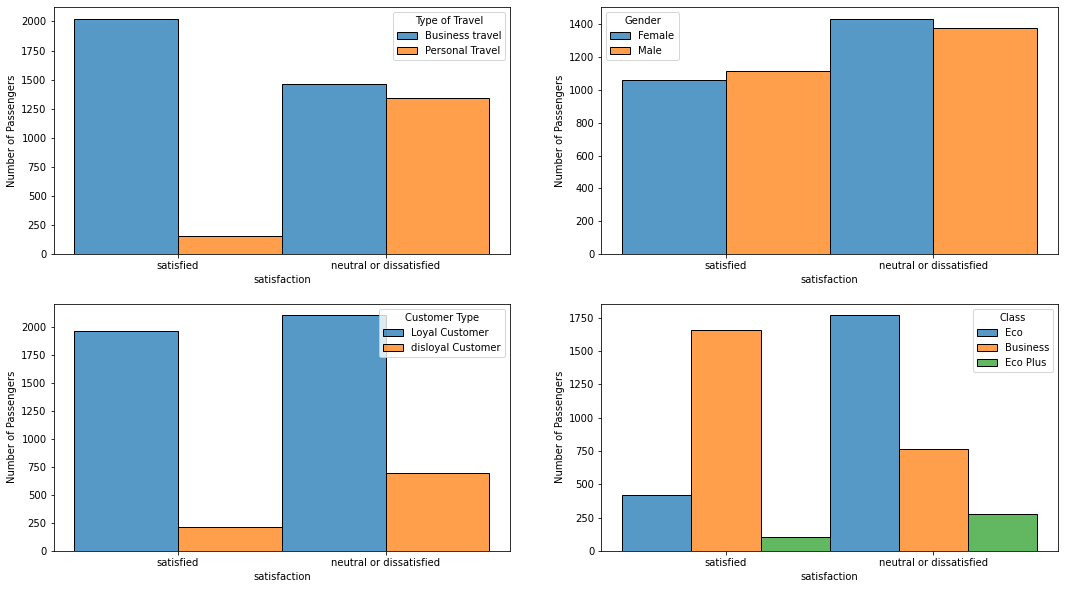

In [3]:
sns.histplot(df['satisfaction'], bins=3).set(ylabel='Number of Passengers')

fig, axes = plt.subplots(2, 2, figsize=(18, 10))
sns.histplot(ax=axes[0, 0], x=df['satisfaction'], hue=df['Type of Travel'], multiple="dodge").set(ylabel='Number of Passengers')
sns.histplot(ax=axes[0, 1], x=df['satisfaction'], hue=df['Gender'], multiple="dodge").set(ylabel='Number of Passengers')
sns.histplot(ax=axes[1, 0], x=df['satisfaction'], hue=df['Customer Type'], multiple="dodge").set(ylabel='Number of Passengers')
sns.histplot(ax=axes[1, 1], x=df['satisfaction'], hue=df['Class'], multiple="dodge").set(ylabel='Number of Passengers');
plt.show()

## Train-test Split

In [4]:
df_train, df_test = train_test_split(df, test_size=.2, random_state=2)
x_train = df_train.drop(labels='satisfaction',axis=1, inplace=False)
x_test = df_test.drop(labels='satisfaction',axis=1, inplace=False)
y_train = df_train['satisfaction'].to_frame()
y_test = df_test['satisfaction'].to_frame()

## 1. Training using KNN-Classifier
### Categorical Variables to Numerical Vectors

In [5]:
cleanup_nums = {'Gender': {'Female': 0, "Male": 1},
                'Customer Type': {'Loyal Customer': 0, 'disloyal Customer': 1},
                'Type of Travel': {'Business travel': 0, 'Personal Travel': 1},
                'Class': {'Eco': 0, 'Eco Plus': 1, 'Business': 2}, 
                'satisfaction': {'neutral or dissatisfied': 0, 'satisfied': 1}}
                
# To convert the columns to numbers using replace :
x_train_num = x_train.replace(cleanup_nums)
x_test_num = x_test.replace(cleanup_nums)
y_train_num = list(y_train.replace(cleanup_nums)['satisfaction'])
y_test_num = list(y_test.replace(cleanup_nums)['satisfaction'])

x_train_num[['Gender', 'Customer Type', 'Type of Travel', 'Class']].head()

,Gender,Customer Type,Type of Travel,Class
4462,1,0,0,2
2319,1,0,1,1
3800,1,1,0,0
2473,0,0,0,1
2005,0,1,0,0


60.68% when k = 1	62.29% when k = 2	61.48% when k = 3	
61.99% when k = 4	62.69% when k = 5	64.29% when k = 6	
64.89% when k = 7	63.89% when k = 8	64.39% when k = 9	
65.6% when k = 10	64.49% when k = 11	65.7% when k = 12	
64.99% when k = 13	64.79% when k = 14	63.99% when k = 15	
64.29% when k = 16	63.29% when k = 17	64.09% when k = 18	
63.39% when k = 19	63.89% when k = 20	63.79% when k = 21	
63.69% when k = 22	62.99% when k = 23	63.29% when k = 24	
62.59% when k = 25	63.69% when k = 26	62.79% when k = 27	
63.09% when k = 28	62.29% when k = 29	63.19% when k = 30	
62.79% when k = 31	63.89% when k = 32	63.49% when k = 33	
63.19% when k = 34	63.19% when k = 35	63.19% when k = 36	
63.19% when k = 37	63.49% when k = 38	63.09% when k = 39	
62.99% when k = 40	
Best accuracy 65.7% accuracy when k = 12


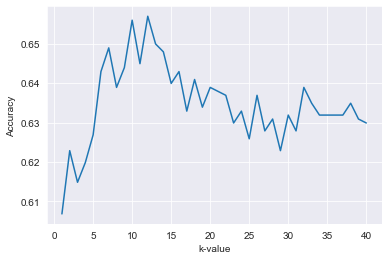

In [6]:
accuracies = []
output = ''
k_range = list(range(1, 41))
for k in k_range:
    clf = KNeighborsClassifier(k).fit(x_train_num, y_train_num)
    prediction = clf.predict(x_test_num)
    accuracy = np.sum(prediction == y_test_num) / len(y_test_num)
    accuracies.append(accuracy)
    output += str(round(accuracy*100, 2)) + '% when k = ' + str(k) + '\t'
    output += '\n'if k%3 == False else ''
print(output)
print('Best accuracy '+ str(round(np.max(accuracies)*100, 2))
      + '% accuracy when k = ' + str(np.argmax(accuracies) + 1))
sns.set_style("darkgrid")
plt.plot(k_range, accuracies)
plt.xlabel('k-value')
plt.ylabel('Accuracy')
plt.show()

### <font color='red'>Best accuracy 65.7% accuracy when k = 12</font> 
--- 

## 2. Training using Logistical Regression Classifier

### Normalization of Data


In [7]:
x_train_num_norm = normalize(x_train_num, norm='l1')
x_test_num_norm = normalize(x_test_num)

### Training the Model

57.67% when C = 1	65.7% when C = 51	
71.11% when C = 101	74.52% when C = 151	75.23% when C = 201	
75.93% when C = 251	76.13% when C = 301	74.62% when C = 351	
72.22% when C = 401	70.21% when C = 451	68.91% when C = 501	
65.9% when C = 551	63.89% when C = 601	60.98% when C = 651	
59.68% when C = 701	57.47% when C = 751	56.17% when C = 801	
54.76% when C = 851	53.96% when C = 901	54.36% when C = 951	

Best accuracy 76.13% accuracy when C = 301


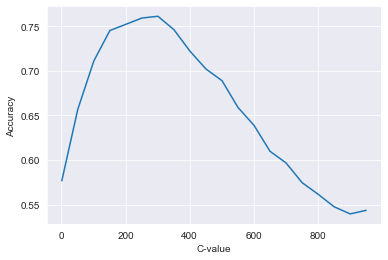

In [8]:
accuracies = []
output = ''
step = 50
C_range = list(range(1,1000, step))
x_train_num_norm = normalize(x_train_num, norm='l1')
x_test_num_norm = normalize(x_test_num)
for c in C_range:
    clf = LogisticRegression(random_state=2, C=c, max_iter=3000).fit(x_train_num_norm, y_train_num)
    prediction = clf.predict(x_test_num_norm)
    accuracy = np.sum(prediction == y_test_num) / len(y_test_num)
    accuracies.append(accuracy)
    output += str(round(accuracy*100, 2)) + '% when C = ' + str(c) + '\t'
    output += '\n'if c%3 == False else ''
print(output)
print('Best accuracy '+ str(round(np.max(accuracies)*100, 2))
      + '% accuracy when C = ' + str(np.argmax(accuracies)*step + 1))
sns.set_style("darkgrid")
plt.plot(C_range, accuracies)
plt.xlabel('C-value')
plt.ylabel('Accuracy')
plt.show()

### <font color='red'>Best accuracy 76.13% accuracy when C = 301</font> 
--- 

## 3. Polynomial Regression Fitting

In [9]:
for d in range(2, 5):
    model = PolynomialFeatures(degree=d)
    x_train_kernel = model.fit_transform(x_train_num)
    x_test_kernel = model.fit_transform(x_test_num)

    clf = linear_model.LinearRegression()
    clf.fit(x_train_kernel, y_train_num)
    prediction = clf.predict(x_test_kernel)
    for i in range(len(prediction)):
        
        # This is a regression model. To change this to classification, we
        # need to classify each node to its closest class. In this case, the distance
        # is smaller to 1 than to 0 when the prediction is greater than 0.5
        prediction[i] = 1 if (prediction[i] >= 0.5) else 0
    accuracy = np.sum(prediction == y_test_num) / len(y_test_num)
    print('Accuracy: ' + str(round(accuracy * 100, 2)) +  '% when degree = ' + str(d))

Accuracy: 92.58% when degree = 2
Accuracy: 85.26% when degree = 3
Accuracy: 66.5% when degree = 4


### As the degree increases, the accuracy of prediction is decreasing after degree = 2. We can tell from this result that the model is overfitting the training set, which leads to a decrease on predicting test set. 

### <font color='red'>Best accuracy 92.58% accuracy when degree = 2</font> 
--- 

## 4. Naive Bayes Classifier

In [10]:
clf = GaussianNB().fit(x_train_num, y_train_num)
prediction = clf.predict(x_test_num)
accuracy = np.sum(prediction == y_test_num) / len(y_test_num)
print('Accuracy: ' + str(round(accuracy, 2)*100) + '%.')

Accuracy: 85.0%.


### <font color='red'>Accuracy is 85.0% for Naive Bayes Model.</font> 
--- 

## 5. Decision Tree Classifier

In [11]:
crits = ['entropy', 'gini']
splts = ['best', 'random']
for crit in crits:
    for splt in splts:
        clf = tree.DecisionTreeClassifier(criterion=crit, splitter=splt).fit(x_train_num, y_train_num)
        prediction = clf.predict(x_test_num)
        accuracy = np.sum(prediction == y_test_num) / len(y_test_num)
        print('Accuracy: ' + str(round(accuracy, 2)*100) + '%.' + 
              ' \n\tSplit: ' + splt + '\tCriterion: '+ crit)

Accuracy: 90.0%. 
	Split: best	Criterion: entropy
Accuracy: 90.0%. 
	Split: random	Criterion: entropy
Accuracy: 91.0%. 
	Split: best	Criterion: gini
Accuracy: 91.0%. 
	Split: random	Criterion: gini


### After multiple times of testing, the decision tree classifier gives results from 89% to 94%. The model always gives a better result when using 'best' as the splitter, while the best result could appear for both 'entropy' and 'gini'. Considering the overall results of the model, the best combination should be 'random' and 'entropy' for the dataset. 

### <font color='red'>Accuracy is 89% - 94% for Decision Tree Model.</font> 
--- 

## 6. Random Forest Classifier

        d=1    d=2    d=3    d=4    d=5    d=6    d=7    d=8    d=9   d=10
N=1  62.29% 77.03% 77.73% 74.22% 86.86% 85.56% 88.37% 87.56% 87.36% 85.66%
N=2  75.83% 83.75% 79.44% 87.66% 87.36% 88.06% 87.76% 88.16% 89.97% 88.57%
N=3  75.83% 80.24% 83.05% 87.36% 87.46% 90.47% 90.77% 90.77% 89.57% 91.27%
N=4  81.24% 81.24% 83.85% 86.66% 90.57% 90.77% 89.87% 89.57% 90.57% 92.68%
N=5  79.54% 82.65% 86.86% 88.47% 91.68% 90.17% 90.57% 90.67% 92.28% 91.68%
N=6  81.85% 83.45% 86.06% 87.46% 90.67% 91.37% 91.37% 91.78% 92.18% 91.47%
N=7  79.44% 82.25% 85.86% 88.16% 90.77% 91.68% 90.87% 91.17% 92.78% 91.47%
N=8  74.42% 85.66% 86.76% 89.97% 89.57% 90.67% 92.58% 92.58% 92.48% 90.07%
N=9  84.65% 86.56% 86.76% 89.97% 90.37% 90.97% 92.08% 91.37% 92.88% 92.58%
N=10 84.25% 86.36% 89.47% 89.87% 91.37% 91.37% 92.58% 92.18% 92.88% 93.08%

The best combination of N and d is: N = 10, d = 10
Accuracy for the best N-d: 0.9307923771313942


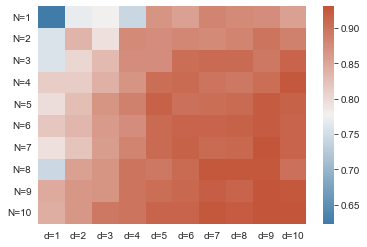

In [12]:
best_N = 0
best_d = 0
best_Acc = 0
max_N = 10
max_d = 10
info = np.zeros(shape=(max_N, max_d))
for N in range(1, max_N + 1):
    for d in range(1, max_d + 1):
        clf = RandomForestClassifier(n_estimators=N, max_depth=d, criterion='entropy').fit(x_train_num, y_train_num)
        prediction = clf.predict(x_test_num)
        accuracy = np.sum(prediction == y_test_num) / len(y_test_num)
        if accuracy > best_Acc:
            best_Acc = accuracy
            best_N = N
            best_d = d
            best_predict = prediction
        # store all error rates to the ndarray
        info[N - 1, d - 1] = accuracy
info = pd.DataFrame(info)

# display as percentage
pd.options.display.float_format = '{:.2%}'.format

# assign corresponding col names and row names
info.columns = list('d=' + str(i) for i in range(1, max_d + 1))
info.index = list('N=' + str(i) for i in range(1, max_N + 1))

# export a heatmap of error rates
sns.heatmap(info, annot=False,
           cmap=sns.diverging_palette(240, 20, n=100), fmt='.4g')
plt.yticks(rotation=0);
print(info)
print('\nThe best combination of N and d is: N = ' + str(best_N) + ', d = ' + str(best_d))
print('Accuracy for the best N-d: ' + str(best_Acc))

### Due to the use of random in this algorithm, the accuracy will fluctuate each time. The best accuracy within N*d trains is around 93.5% after multiple testing. 

### <font color='red'>Accuracy is 93.5% for Random Forest Model.</font> 
--- 

# Conclusion

### After training various models, there are three of them performing extraordinarily well. Multivariate Polynomial Regression, Decision Tree, and Random Forest all have possibility to reach 93% of accuracy. By using these models, we are 93% sure that we could predict his/her satisfaction level based on the data he/she gives. 